# 1. Let’s import the data

In [46]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("titanic_dataset/train.csv")

# 2. EDA (Exploratory data analysis)

In [48]:
# columns information
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [49]:
print(f"Total number of columns are {len(list(df.columns))}")

Total number of columns are 12


In [50]:
# Let's seperate the dataset
y = df[["Survived"]]

In [51]:
X = df.copy(deep=True) # Let's do a copy in order to preseve the df dataset in memory and saved from inplace operations

In [52]:
# Let's remove passenger id, and consider be moved -1
X = X.drop("PassengerId", axis=1)

In [53]:
X

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
# For our first version of the model let's remove also Name and ticket from the equation
col_to_remove = ["Name", "Ticket", "Cabin"]
for col in col_to_remove:
    try:
        X = X.drop(col, axis=1) # can use inplace=True
    except KeyError:
        print(f"{col} not in data")

In [55]:
# Let's take a look in the dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [56]:
import matplotlib.pyplot as plt

In [57]:
columns = X.columns[:-1] # Embarked cannot be plotted just yet because is not either categorical or converted to numbers

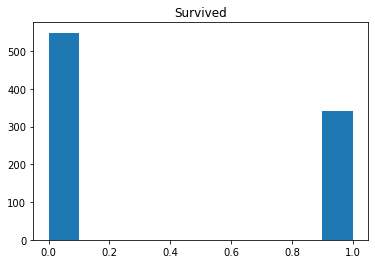

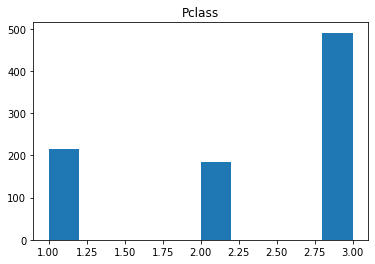

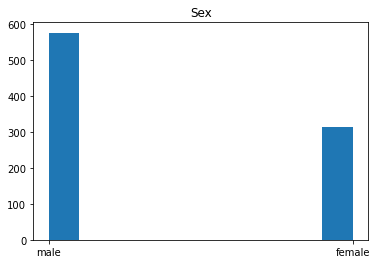

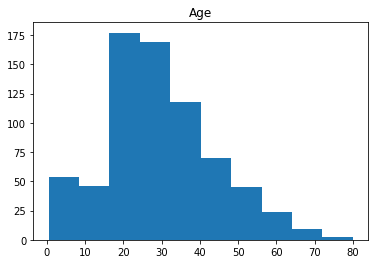

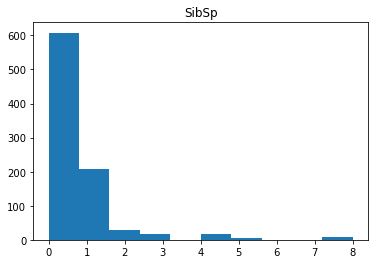

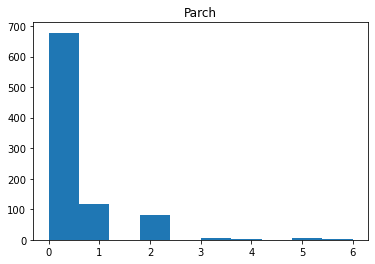

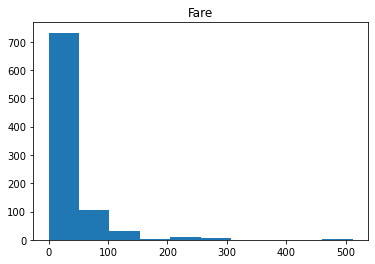

In [58]:
for col in columns:
    plt.hist(x=df[col])
    plt.title(col)
    plt.show()

Given this data, we have a better understanding of the data. And this helps to understand better how how should fill the values for the age. Let's start by filling with the average age


In [59]:
# If we analyse some of the features with the predict label 
X[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We can see that people on the best classes had better chances of survival


In [60]:
X[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


People from the female sex, as expected, had better chances of survival

In [61]:
X[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [62]:
X[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [63]:
X.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

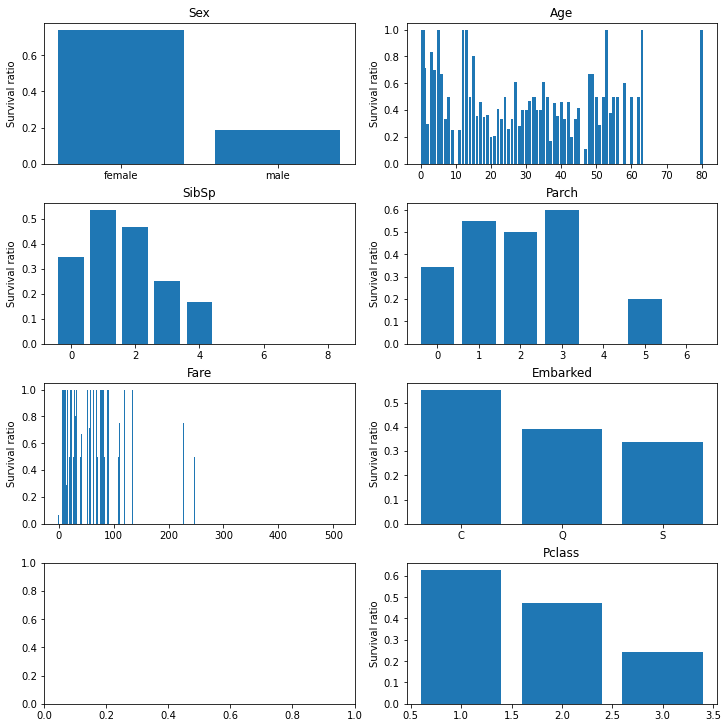

In [64]:
# Lets compare the feature values with predict label
fig, axs = plt.subplots(4, 2, figsize=(10, 10), constrained_layout=True)

for i, col in enumerate(X.columns[1:]):
    sub_cols = [col, "Survived"]

    data = X[sub_cols].groupby([col], as_index=False).mean()

    axs.flat[i-1].bar(data[col], data["Survived"])
    axs.flat[i-1].set_title(col)
    axs.flat[i-1].set_ylabel("Survival ratio")

# 3. Data filling

In [65]:

age_mean = np.mean(X.Age)

In [66]:
X.loc[:, ["Age"]] = X.Age.fillna(value=age_mean)

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Only **Embarked** missing. This, like gender are a very speacial type of variable, that we discussed. So, what we can do is to convert this, into categorical variable first. There are several techniques, that I we are going to test later, but for now we are going to do label encoding by mapping the categorical variable into a integer. We need to be careful with this because this might lead to trouble in linear models. 

In [68]:
# The first thing we do is to identify the unique variables
X.loc[:, "Sex"].unique()

array(['male', 'female'], dtype=object)

# 4. Encode Categorical variables

In [69]:
# as expected so now we need to map it to 0 and 1
sex_map = {"male": 0, "female": 1}
X.loc[:, "Sex"] = X.loc[:, "Sex"].apply(lambda x: sex_map[x] )
# This could also be done using LabelEncoder

In [70]:
# now for embarked 
# convert to categorical 
X['Embarked'] = pd.Categorical(X.Embarked)

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int64   
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(1), float64(2), int64(5)
memory usage: 49.9 KB


In [72]:
# The first thing we do is to identify the unique variables
X.loc[:, "Embarked"].unique()

['S', 'C', 'Q', NaN]
Categories (3, object): ['C', 'Q', 'S']

In [73]:
# Let's count the most frequent embark location
X["Embarked"].value_counts() # Let's replace by S

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [74]:
X["Embarked"] = X["Embarked"].fillna(value="S")

In [84]:
X.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [76]:
Embarked_map = {"S":0, "C":1, "Q":2}
X.loc[:, "Embarked"] = X.loc[:, "Embarked"].apply(lambda x: Embarked_map[x] )

In [77]:
# conver Embarked to integer
X.Embarked = X.Embarked.astype("int") 

# 5.Split data into train and test

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X.drop("Survived", axis=1),
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [80]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
114,3,1,17.000000,0,0,14.4583,1
874,2,1,28.000000,1,0,24.0000,1
76,3,0,29.699118,0,0,7.8958,0
876,3,0,20.000000,0,0,9.8458,0
674,2,0,29.699118,0,0,0.0000,0
...,...,...,...,...,...,...,...
715,3,0,19.000000,0,0,7.6500,0
767,3,1,30.500000,0,0,7.7500,2
72,2,0,21.000000,0,0,73.5000,0
235,3,1,29.699118,0,0,7.5500,0


In [81]:
y_train

,Survived
114,0
874,1
76,0
876,0
674,0
...,...
715,0
767,0
72,0
235,0


In [96]:
#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [98]:
# Application of all Machine Learning methods
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [100]:
# prepare configuration for cross validation test harness
seed = 7

In [148]:
# Let's see if by doing a k-fold validation we achieve different accuracy metrics
from sklearn.model_selection import KFold 


# 7.Let's analyse various models performance

In [155]:
# evaluate each model in turn
# apply a k fold with 10 splits
# calculate accuracy average and standart deviation for each model

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

LR: 0.802714 (0.044218)
LDA: 0.799539 (0.040418)
KNN: 0.695238 (0.050370)
CART: 0.789862 (0.049939)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

NB: 0.802842 (0.068075)
SVM: 0.680748 (0.072429)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:
pd.concat([pd.DataFrame(names), pd.DataFrame(results)], axis=1)

,0,0,1,2,3,4,5,6,7,8,9
0,LR,0.746032,0.761905,0.809524,0.806452,0.822581,0.903226,0.741935,0.822581,0.806452,0.806452
1,LDA,0.730159,0.761905,0.793651,0.806452,0.854839,0.870968,0.774194,0.822581,0.806452,0.774194
2,KNN,0.698413,0.634921,0.619048,0.677419,0.725806,0.725806,0.629032,0.741935,0.725806,0.774194
3,CART,0.714286,0.777778,0.793651,0.806452,0.854839,0.838710,0.693548,0.806452,0.838710,0.774194
4,NB,0.714286,0.666667,0.857143,0.790323,0.903226,0.854839,0.758065,0.838710,0.822581,0.822581
5,SVM,0.666667,0.603175,0.666667,0.661290,0.790323,0.693548,0.548387,0.693548,0.677419,0.806452


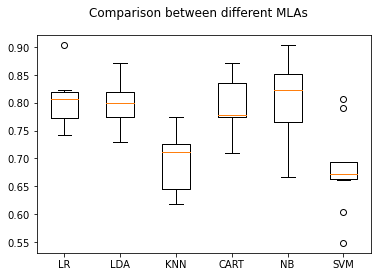

In [110]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [158]:
# Application of all Machine Learning methods
MLA = [
    #GLM
    linear_model.LogisticRegression(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
  
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    ]

In [161]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [162]:
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
1,LogisticRegressionCV,0.8218,0.7836,0.782178,0.686957,0.771583
0,LogisticRegression,0.8154,0.7799,0.774510,0.686957,0.768315
7,BaggingClassifier,0.9711,0.7799,0.833333,0.608696,0.758596
9,GradientBoostingClassifier,0.9037,0.7799,0.833333,0.608696,0.758596
6,AdaBoostClassifier,0.8555,0.7761,0.777778,0.669565,0.762887
10,RandomForestClassifier,0.9888,0.7724,0.800000,0.626087,0.754220
3,RidgeClassifierCV,0.8090,0.7687,0.773196,0.652174,0.754192
13,NuSVC,0.8331,0.7687,0.762376,0.669565,0.756351
8,ExtraTreesClassifier,0.9888,0.7649,0.770833,0.643478,0.749844
17,GaussianNB,0.8042,0.7575,0.740385,0.669565,0.746547


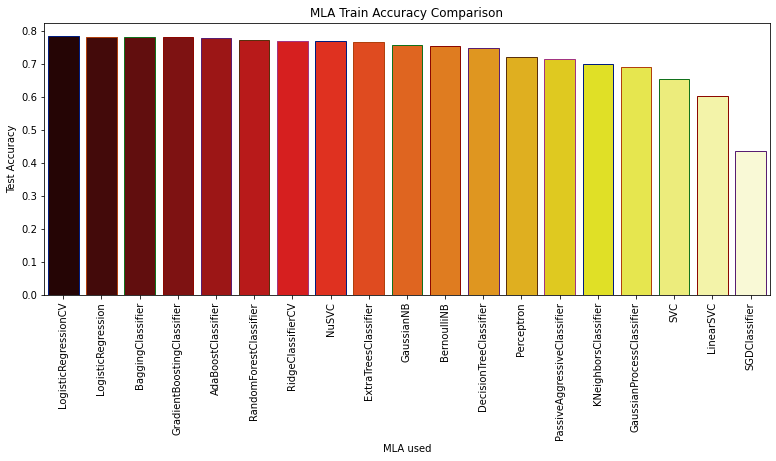

In [164]:
# Creating plot to show the train accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

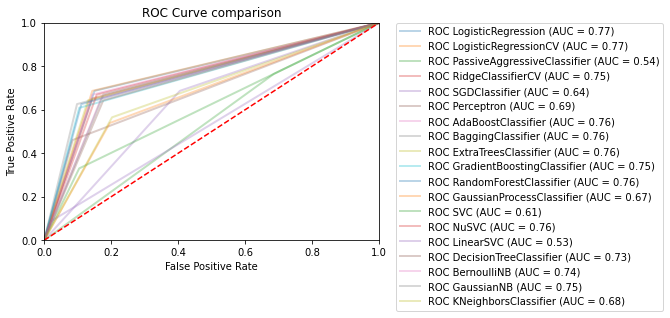

In [166]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()